# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [80]:
merged_df.rename(columns={'Mouse ID': 'Mouse_ID', 'Drug Regimen': 'Drug_Regimen', 'Age_months':'Age(mo)', 'Weight (g)':'Weight(gm)', 'Tumor Volume (mm3)':'Tumor_Volume(mm3)','Metastatic Sites':'Metastatic_Sites'}, inplace=True)
#merged_df.to_excel('dataframe.xlsx')
merged_df

,Mouse_ID,Drug_Regimen,Sex,Age(mo),Weight(gm),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [81]:
# check number of mice (at t = 0)

uniq_mice_df = merged_df.loc[merged_df['Timepoint']==0]

uniq_mice_df.sort_values(by=['Mouse_ID'])


,Mouse_ID,Drug_Regimen,Sex,Age(mo),Weight(gm),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
454,a203,Infubinol,Female,20,23,0,45.0,0
464,a251,Infubinol,Female,21,25,0,45.0,0
474,a262,Placebo,Female,17,29,0,45.0,0
484,a275,Ceftamin,Female,20,28,0,45.0,0
494,a366,Stelasyn,Female,16,29,0,45.0,0
...,...,...,...,...,...,...,...,...
1860,z435,Propriva,Female,12,26,0,45.0,0
75,z578,Ramicane,Male,11,16,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [82]:
grouped_df = merged_df.groupby(['Mouse_ID']).count()
#grouped_df.to_excel("grouped.xlsx")
grouped_df.dropna()


,Drug_Regimen,Sex,Age(mo),Weight(gm),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
Mouse_ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [83]:
df_duplicated = merged_df[merged_df[['Mouse_ID', 'Timepoint']].duplicated()==True]
df_duplicated

,Mouse_ID,Drug_Regimen,Sex,Age(mo),Weight(gm),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [84]:
merged_df.groupby(['Mouse_ID']).count()

,Drug_Regimen,Sex,Age(mo),Weight(gm),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
Mouse_ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [85]:
# Optional: Get all the data for the duplicate mouse ID. 
#mouse_index_df.query("Mouse_ID == 'g989'")
merged_df.query("Mouse_ID == 'g989'")


,Mouse_ID,Drug_Regimen,Sex,Age(mo),Weight(gm),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [86]:
mouse_index_df = merged_df.set_index("Mouse_ID")
mouse_index_df

,Drug_Regimen,Sex,Age(mo),Weight(gm),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
Mouse_ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [87]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_index_df.drop('g989')
clean_df.to_excel('df_clean.xlsx')
clean_df

,Drug_Regimen,Sex,Age(mo),Weight(gm),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
Mouse_ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [88]:
# Checking the number of mice in the clean DataFrame.
clean_grouped_df = clean_df.groupby(['Mouse_ID']).count()
clean_grouped_df.to_excel('clean_grouped_df.xlsx')
clean_grouped_df

,Drug_Regimen,Sex,Age(mo),Weight(gm),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
Mouse_ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [89]:
#df2 = clean_df.rename_axis('Mouse_ID').reset_index()
#df2

clean_df = clean_df.rename_axis('Mouse_ID').reset_index()
clean_df

,Mouse_ID,Drug_Regimen,Sex,Age(mo),Weight(gm),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [90]:
# check clean_df again for size
clean_df.query("Mouse_ID == 'g989'")

clean_df.groupby(['Mouse_ID']).count()


,Drug_Regimen,Sex,Age(mo),Weight(gm),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
Mouse_ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [91]:
## Summary Statistics

clean_df.groupby(['Drug_Regimen'])['Tumor_Volume(mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug_Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [92]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_stats_df = pd.DataFrame()
tumor_stats_df['Mean'] = clean_df.groupby(['Drug_Regimen'])['Tumor_Volume(mm3)'].mean()
tumor_stats_df['Median'] = clean_df.groupby(['Drug_Regimen'])['Tumor_Volume(mm3)'].median()
tumor_stats_df['Variance'] = clean_df.groupby(['Drug_Regimen'])['Tumor_Volume(mm3)'].var()
tumor_stats_df['Std_Dev'] = clean_df.groupby(['Drug_Regimen'])['Tumor_Volume(mm3)'].std()
tumor_stats_df['Std_Err_Mean'] = clean_df.groupby(['Drug_Regimen'])['Tumor_Volume(mm3)'].sem()


tumor_stats_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean,Median,Variance,Std_Dev,Std_Err_Mean
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [93]:
clean_df = clean_df.reset_index()
clean_df

,index,Mouse_ID,Drug_Regimen,Sex,Age(mo),Weight(gm),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [94]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


In [95]:
# index adjustment

by_regimen_indexed_df = by_regimen_df.reset_index()
by_regimen_indexed_df

,Drug_Regimen,index,Mouse_ID,Sex,Age(mo),Weight(gm),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
0,Capomulin,230,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181,181
6,Propriva,148,148,148,148,148,148,148,148
7,Ramicane,228,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182,182


In [96]:
# sort descending according to mouse_id count numbers for each regimen

by_regimen_indexed_sorted_df = by_regimen_indexed_df.sort_values(by=df2.columns[2], ascending=False)
by_regimen_indexed_sorted_df
#x_vals = df2.loc(['Drug_Regimen'])
#x_vals
#y_vals = df2['Mouse_ID']
#plt(x_vals, y_vals)

,Drug_Regimen,index,Mouse_ID,Sex,Age(mo),Weight(gm),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
0,Capomulin,230,230,230,230,230,230,230,230
7,Ramicane,228,228,228,228,228,228,228,228
3,Ketapril,188,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186,186
9,Zoniferol,182,182,182,182,182,182,182,182
5,Placebo,181,181,181,181,181,181,181,181
8,Stelasyn,181,181,181,181,181,181,181,181
1,Ceftamin,178,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178,178
6,Propriva,148,148,148,148,148,148,148,148


In [97]:
## Bar and Pie Charts

<Axes: xlabel='Drug_Regimen'>

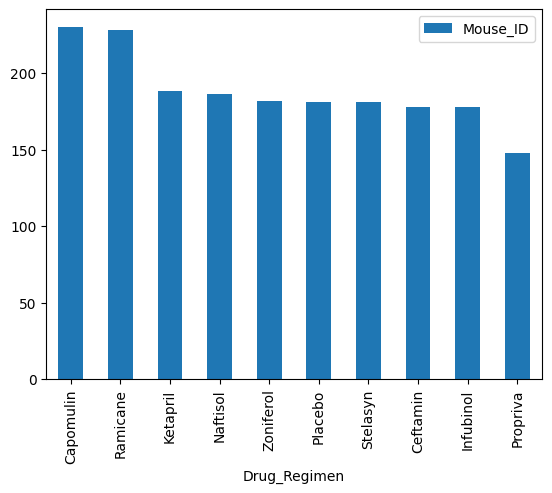

In [100]:
## Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

by_regimen_indexed_sorted_df.plot.bar(x='Drug_Regimen', y='Mouse_ID')

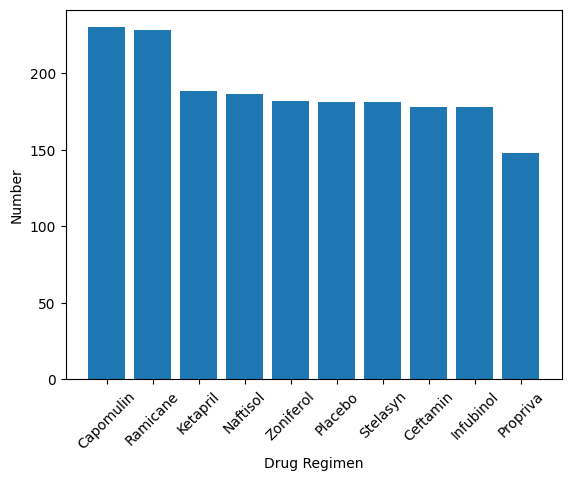

In [99]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_values = by_regimen_indexed_sorted_df['Drug_Regimen']
y_values = by_regimen_indexed_sorted_df['Mouse_ID']
plt.bar(x_values, y_values)
plt.tick_params(axis='x', rotation=45)
plt.xlabel('Drug Regimen')
plt.ylabel('Number')
plt.show()

<Axes: ylabel='Sex Distribution of Mice'>

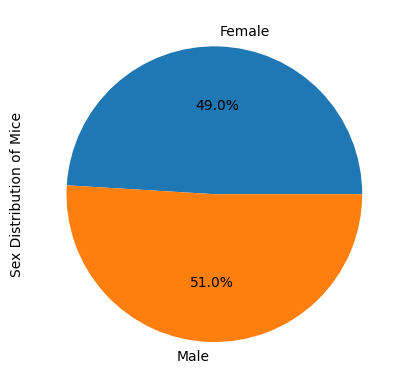

In [129]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df.Mouse_ID.groupby(clean_df.Sex).count().plot(kind='pie', autopct='%1.1f%%', ylabel="Sex Distribution of Mice")

In [208]:
sex_summary_df = clean_df.groupby(['Sex']).count()


,index,Mouse_ID,Drug_Regimen,Age(mo),Weight(gm),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
Sex,,,,,,,,
Female,922,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958,958


In [220]:
sex_summary_df.reset_index()

,Sex,Mouse_ID,Drug_Regimen,Age(mo),Weight(gm),Timepoint,Tumor_Volume(mm3),Metastatic_Sites
0,Female,922,922,922,922,922,922,922
1,Male,958,958,958,958,958,958,958


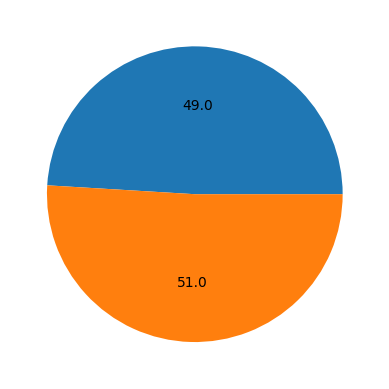

In [227]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
yval = sex_summary_df['Mouse_ID']
#xval = sex_summary_df.loc['Sex']
#xval
plt.pie(yval, autopct="%1.1f")
plt.show()

## Quartiles, Outliers and Boxplots

In [234]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = clean_df.groupby(['Mouse_ID'])['Timepoint'].max()
max_timepoint_df.to_excel('max_timepoint_df.xlsx')
max_timepoint_df


Mouse_ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [241]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
result_merged_df = pd.merge(clean_df, max_timepoint_df, on="Mouse_ID")
query_result_timepoint_max = result_merged_df.query("Timepoint_x == Timepoint_y")
query_result_timepoint_max

,index,Mouse_ID,Drug_Regimen,Sex,Age(mo),Weight(gm),Timepoint_x,Tumor_Volume(mm3),Metastatic_Sites,Timepoint_y
9,9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...,...
1846,1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1849,1849,z435,Propriva,Female,12,26,10,48.710661,0,10
1859,1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
1869,1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [243]:
query_result_timepoint_max.groupby('Drug_Regimen')['Tumor_Volume(mm3)'].mean()

Drug_Regimen
Capomulin    36.667568
Ceftamin     57.753977
Infubinol    58.178246
Ketapril     62.806191
Naftisol     61.205757
Placebo      60.508414
Propriva     56.493884
Ramicane     36.191390
Stelasyn     61.001707
Zoniferol    59.181258
Name: Tumor_Volume(mm3), dtype: float64

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
